# Advanced Lane Line Detection

## 0. Load Image

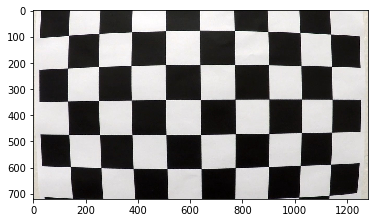

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline

img = mpimg.imread("camera_cal/calibration1.jpg")
plt.imshow(img)

## 1. Camera Calibration

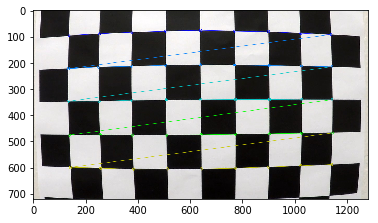

In [5]:
# arrays to store object points(real world) and image points for all the images

objpoints = []
imgpoints = []

nx = 9
ny = 5

objectp = np.zeros((nx * ny, 3), np.float32)

objectp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) # x, y coordinates

#convert img into grayscale
#If you are reading in an image using mpimg.imread()
#this will read in an RGB image and you should 
#convert to grayscale using cv2.COLOR_RGB2GRAY
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#print(gray)
#FIND the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

#print(ret)

if ret == True:
    imgpoints.append(corners)
    objpoints.append(objectp)
    
    img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

## 2. Distortion Correction

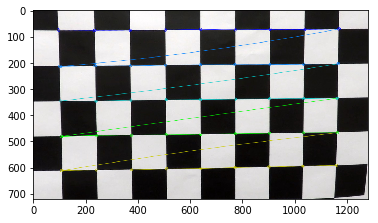

In [11]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist)

## 3. Color and Gradient Threshold

## 4. Perspective Transform

In [17]:
# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients
def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    warped = None
    M = None
    print(ret)
    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    
    return warped, M


In [20]:
warped, M = corners_unwarp(img, 9, 7, mtx, dist)
print(warped)

False
None


## 5. 